# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
length_sufficient = False
sample_size = 600

while length_sufficient == False:
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = list(zip(lats, lngs))

    # Identify nearest city for each lat, lng combination.  Ensure that the sample size is exactly n=sample_size cities
    counter = 0
    while len(cities) < sample_size and counter < 1500:
        lat_lng = lat_lngs[counter]
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        if city not in cities:
            cities.append(city)
        counter+=1

    # Print the city count to confirm sufficient count
    if len(cities) == sample_size:
        length_sufficient = True
        print("Sample Selected")
    else: 
        print("Insufficient Sample Size.  Resampling.")

Insufficient Sample Size.  Resampling.
Sample Selected


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
results = {}
city_number = 0
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    params = {"q":city , "APPID":api_key , "units" : "Imperial"}
    result = requests.get(base_url,params=params).json()
    try:
        result_lat = result['coord']
        results[city] = result
        print(f"{city} processed - city number {city_number}")
        city_number+=1
    except KeyError:
        print(f"No data for {city}")
    
    

kununurra processed - city number 0
sao filipe processed - city number 1
No data for sorvag
hilo processed - city number 2
busselton processed - city number 3
klaksvik processed - city number 4
saint anthony processed - city number 5
thompson processed - city number 6
bethel processed - city number 7
albany processed - city number 8
port alfred processed - city number 9
barrow processed - city number 10
gazojak processed - city number 11
No data for illoqqortoormiut
cape town processed - city number 12
tazovskiy processed - city number 13
mendoza processed - city number 14
naryan-mar processed - city number 15
sfantu gheorghe processed - city number 16
weligama processed - city number 17
No data for samusu
bosaso processed - city number 18
tura processed - city number 19
ushuaia processed - city number 20
cuamba processed - city number 21
rikitea processed - city number 22
hailakandi processed - city number 23
kapaa processed - city number 24
port hedland processed - city number 25
No 

No data for negotino-polosko
caceres processed - city number 213
baruun-urt processed - city number 214
annau processed - city number 215
shihezi processed - city number 216
pacific grove processed - city number 217
dubbo processed - city number 218
utevka processed - city number 219
keningau processed - city number 220
preston processed - city number 221
payakumbuh processed - city number 222
wonthaggi processed - city number 223
abu samrah processed - city number 224
mayo processed - city number 225
zhuanghe processed - city number 226
No data for xiongshi
dryden processed - city number 227
No data for tiruvottiyur
brigantine processed - city number 228
No data for amderma
No data for tumannyy
acapulco processed - city number 229
clinton processed - city number 230
No data for haibowan
camacha processed - city number 231
kyshtovka processed - city number 232
No data for artyk
new norfolk processed - city number 233
san quintin processed - city number 234
kirkuk processed - city numbe

mao processed - city number 424
No data for louisbourg
manubul processed - city number 425
thinadhoo processed - city number 426
ugoofaaru processed - city number 427
dalbandin processed - city number 428
vostok processed - city number 429
No data for alotau
medicine hat processed - city number 430
bouloupari processed - city number 431
qaqortoq processed - city number 432
athens processed - city number 433
No data for lolua
lisala processed - city number 434
No data for redhakhol
rosarito processed - city number 435
davidson processed - city number 436
sabha processed - city number 437
No data for pousat
turukhansk processed - city number 438
kulhudhuffushi processed - city number 439
charters towers processed - city number 440
porto novo processed - city number 441
fomboni processed - city number 442
gargzdai processed - city number 443
qiongshan processed - city number 444
No data for obluche
salym processed - city number 445
No data for ngukurr
langsa processed - city number 446
al

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
found_results = {}
for city in results:
    try:
        a = results[city]["coord"]
        found_results[city]=results[city]
    except KeyError:
        #print(f"No data for {city}")
        pass

print(f"{len(found_results)} results remaining")

540 results remaining


In [30]:
?pd.DataFrame

In [45]:
results_clean = []
for city in results:
    results_clean.append({"City" : city , 
                          "Latitude" : results[city]["coord"]["lat"],
                          "Temperature": results[city]["main"]["temp"],
                           "Humidity": results[city]["main"]["humidity"],
                           "Cloudiness": results[city]["clouds"]["all"],
                           "Wind Speed": results[city]["wind"]["speed"]})
    

weather_data = pd.DataFrame(results_clean)

weather_data.to_csv("output_data_file")
weather_data

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,kununurra,-15.77,86.00,70,45,6.93
1,sao filipe,14.90,72.68,65,97,11.83
2,hilo,19.73,63.95,89,20,5.82
3,busselton,-33.65,61.00,66,0,5.99
4,klaksvik,62.23,41.00,58,94,25.28
...,...,...,...,...,...,...
535,safranbolu,41.25,46.40,70,75,2.24
536,cedar city,37.68,32.00,86,1,13.87
537,balagansk,54.01,2.39,89,100,1.48
538,swift current,50.28,-22.00,74,75,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

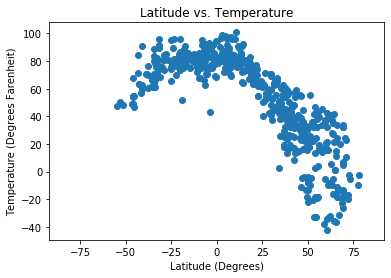

<Figure size 432x288 with 0 Axes>

In [46]:
dependent = weather_data["Latitude"]
independent = weather_data["Temperature"]
y_length = independent.max()-independent.min()
minimum = independent.min()- .05*(y_length)
maximum = independent.max()+ .05*(y_length)
plt.scatter(dependent,independent)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Degrees Farenheit)")
plt.title("Latitude vs. Temperature")
plt.xlim(-92,92)
plt.ylim(minimum,maximum)
plt.show()
plt.savefig("temperature.png")

#### Latitude vs. Humidity Plot

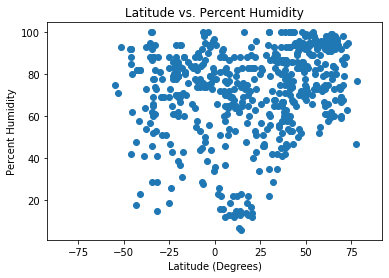

<Figure size 432x288 with 0 Axes>

In [47]:
dependent = weather_data["Latitude"]
independent = weather_data["Humidity"]
y_length = independent.max()-independent.min()
minimum = independent.min()- .05*(y_length)
maximum = independent.max()+ .05*(y_length)
plt.scatter(dependent,independent)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Percent Humidity")
plt.title("Latitude vs. Percent Humidity")
plt.xlim(-92,92)
plt.ylim(minimum,maximum)
plt.show()
plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

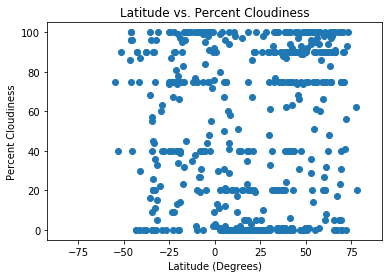

<Figure size 432x288 with 0 Axes>

In [48]:
dependent = weather_data["Latitude"]
independent = weather_data["Cloudiness"]
y_length = independent.max()-independent.min()
minimum = independent.min()- .05*(y_length)
maximum = independent.max()+ .05*(y_length)
plt.scatter(dependent,independent)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Percent Cloudiness")
plt.title("Latitude vs. Percent Cloudiness")
plt.xlim(-92,92)
plt.ylim(minimum,maximum)
plt.show()
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

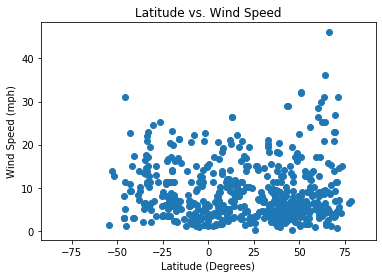

<Figure size 432x288 with 0 Axes>

In [49]:
dependent = weather_data["Latitude"]
independent = weather_data["Wind Speed"]
y_length = independent.max()-independent.min()
minimum = independent.min()- .05*(y_length)
maximum = independent.max()+ .05*(y_length)
plt.scatter(dependent,independent)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.xlim(-92,92)
plt.ylim(minimum,maximum)
plt.show()
plt.savefig("windspeed.png")